In [278]:
# y^2 = x^3 + a*x + b

In [279]:
import numpy as np
import matplotlib.pyplot as plt

In [280]:
O = (np.inf, np.inf)

In [281]:
def add_points(P, Q, p):
    xP, yP = P
    xQ, yQ = Q
    
    if xP == xQ and yP == yQ:
        beta = (3*xP*xQ + a) * pow(2*yP, -1, p)
    else:
        beta = (yQ - yP) * pow(xQ - xP, -1, p)
    
    xR = (beta*beta - xP - xQ) % p
    yR = (beta * (xP - xR) - yP) % p
    
    is_on_curve((xR, yR), p)
            
    return xR, yR

In [282]:
def add_points_str(P, Q, p):
    xP, yP = P
    xQ, yQ = Q
    
    print()
    if xP == xQ and yP == yQ:
        atas = 3*xP*xQ + a
        bawah = 2*yP
        alpha = pow(atas,1,p) * pow(bawah, -1, p)
        atas_pow = pow(atas,1,p)
        inverse = pow(bawah, -1, p)
        print(f'alpha = (3*{xP*xP} + {a}) / (2*{yP}) mod {p} = {atas_pow} * {inverse} mod {p} = {alpha}')
    else:
        atas = yQ - yP
        bawah = xQ - xP
        alpha = pow(atas,1,p) * pow(bawah, -1, p)
        alpha = pow(alpha,1,p)
        inverse = pow(bawah, -1, p)
        print(f'alpha = ({yQ} - {yP}) / ({xQ} - {xP}) mod {p} = {atas} * {inverse} mod {p} = {alpha}')
    
    xR = (alpha*alpha - xP - xQ) % p
    yR = (alpha * (xP - xR) - yP) % p
    print(f"xR = ({alpha}*{alpha} - {xP} - {xQ}) % {p} = {xR}")
    print(f"yR = ({alpha} * ({xP} - {xR}) - {yP}) % {p} = {yR}")
    
    is_on_curve((xR, yR), p)
            
    return xR, yR

In [283]:
def is_on_curve(P, p):
    x, y = P
    assert (y*y) % p == (pow(x,3,p) + a*x + b) % p

In [284]:
# y^2 = x^3 + x + 1
# modulo
x = 11
a = 1
b = 6


# base point
G = (2, 7)

p = x

In [285]:
is_on_curve(G, p)

In [286]:
points = []
print(f"G = {G}")
points.append(G)
current_point = G
n = 1
while True:
    try:
        print(f"{n}G = {current_point}")
        current_point = add_points_str(current_point, G, p)
        n += 1
        points.append(current_point)
    except:
        print(f"{n + 1}G = {O}")
        break

G = (2, 7)
1G = (2, 7)

alpha = (3*4 + 1) / (2*7) mod 11 = 2 * 4 mod 11 = 8
xR = (8*8 - 2 - 2) % 11 = 5
yR = (8 * (2 - 5) - 7) % 11 = 2
2G = (5, 2)

alpha = (7 - 2) / (2 - 5) mod 11 = 5 * 7 mod 11 = 2
xR = (2*2 - 5 - 2) % 11 = 8
yR = (2 * (5 - 8) - 2) % 11 = 3
3G = (8, 3)

alpha = (7 - 3) / (2 - 8) mod 11 = 4 * 9 mod 11 = 3
xR = (3*3 - 8 - 2) % 11 = 10
yR = (3 * (8 - 10) - 3) % 11 = 2
4G = (10, 2)

alpha = (7 - 2) / (2 - 10) mod 11 = 5 * 4 mod 11 = 9
xR = (9*9 - 10 - 2) % 11 = 3
yR = (9 * (10 - 3) - 2) % 11 = 6
5G = (3, 6)

alpha = (7 - 6) / (2 - 3) mod 11 = 1 * 10 mod 11 = 10
xR = (10*10 - 3 - 2) % 11 = 7
yR = (10 * (3 - 7) - 6) % 11 = 9
6G = (7, 9)

alpha = (7 - 9) / (2 - 7) mod 11 = -2 * 2 mod 11 = 7
xR = (7*7 - 7 - 2) % 11 = 7
yR = (7 * (7 - 7) - 9) % 11 = 2
7G = (7, 2)

alpha = (7 - 2) / (2 - 7) mod 11 = 5 * 2 mod 11 = 10
xR = (10*10 - 7 - 2) % 11 = 3
yR = (10 * (7 - 3) - 2) % 11 = 5
8G = (3, 5)

alpha = (7 - 5) / (2 - 3) mod 11 = 2 * 10 mod 11 = 9
xR = (9*9 - 3 - 2) % 11 = 10
yR 

In [287]:
points_dict = {}
points = []
print(f"G = {G}")
points_dict[1] = G
points.append(G)
current_point = G
n = 1
while True:
    try:
        current_point = add_points(current_point, G, p)
        n += 1
        print(f"{n}G = {current_point}")
        points_dict[n] = current_point
        points.append(current_point)
    except:
        print(f"{n + 1}G = {O}")
        break

G = (2, 7)
2G = (5, 2)
3G = (8, 3)
4G = (10, 2)
5G = (3, 6)
6G = (7, 9)
7G = (7, 2)
8G = (3, 5)
9G = (10, 9)
10G = (8, 8)
11G = (5, 9)
12G = (2, 4)
13G = (inf, inf)


In [288]:
# 5 x G = 1 x G
add_points(P = (5, 2), Q = (8, 3), p = p)

(3, 6)

In [289]:
# 30 x G = 2 x G
# add_points(P = (0, 22), Q = (3, 13), p = p)

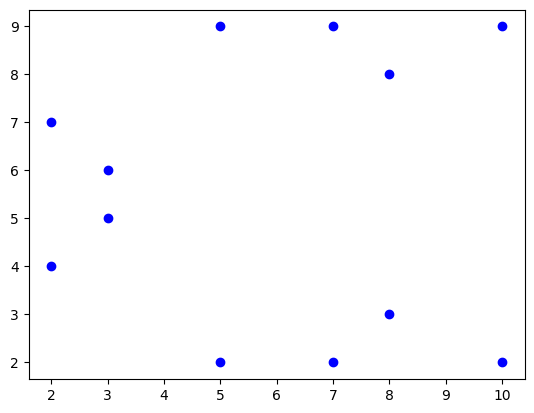

In [290]:
for point in points:
    plt.scatter(point[0], point[1], c = "blue")
plt.show()

In [291]:
# F(p) = n
print(f"F({p}) = {  +1}")

F(11) = 1


In [292]:
# Kunci Rahasia B adalah nB = 3
# a. cari kuncio publik B
nB = 3



Pb = points_dict[nB]
print(f'Kunci Publik B = {nB}G = {Pb}')


Kunci Publik B = 3G = (8, 3)


In [295]:
# b. A melakukan enkripsi pesan Pm = (10,9) dengan nilai random k = 4. Tentukan ciphertext Cm.
# Cm = [kG, Pm + kPb]
k = 4
Pm = (10,9)



kPb = k * nB
find = 0
# looping Pm and get key
for key, value in points_dict.items():
    if value == Pm:
        find = key
        break
print(f'A melakukan enkripsi pesan Pm = {Pm} dengan nilai random k = {k}. Tentukan ciphertext Cm.')
Cm = [f'{k}G', f'{find}G + {kPb}G']
print(f'    Cm = {Cm}')
Cm = [f'{k}G', f'{find+kPb}G']
print(f'    Cm = {Cm}')
find_kPb = (find+kPb) % (n+1)
Cm = [f'{k}G', f'{find_kPb}G']
print(f'    Cm = {Cm}')
X = points_dict[int(Cm[0].replace("G",""))]
Y = points_dict[int(Cm[1].replace("G",""))]
print(f'    Cm = [{X}, {Y}]')

A melakukan enkripsi pesan Pm = (10, 9) dengan nilai random k = 4. Tentukan ciphertext Cm.
    Cm = ['4G', '9G + 12G']
    Cm = ['4G', '21G']
    Cm = ['4G', '8G']
    Cm = [(10, 2), (3, 5)]


In [317]:
# c. Dekripsi Cm 
# Y - nb(X)
print(f'X = {X}, Y = {Y}')
print(f'Decrypt Cm = Y - nB(X)')
print(f'Decrypt Cm = {Y} - {nB} * {X}')
find_X = 0
find_Y = 0
# looping Pm and get key
for key, value in points_dict.items():
    if value == X:
        find_X = key
    if value == Y:
        find_Y = key
        break
print(f'Decrypt Cm = {find_Y}G - {nB} * {find_X}G')
Decrypt_Cm = find_Y - nB * find_X
print(f'Decrypt Cm = {Decrypt_Cm}G', end = '')
Decrypt_Cm = Decrypt_Cm % (n+1)
print(f' = {Decrypt_Cm}G')
print(f'           = {points_dict[Decrypt_Cm]}')



X = (10, 2), Y = (3, 5)
Decrypt Cm = Y - nB(X)
Decrypt Cm = (3, 5) - 3 * (10, 2)
Decrypt Cm = 8G - 3 * 4G
Decrypt Cm = -4G = 9G
           = (10, 9)
